In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sp

pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)
sns.set_theme(context="paper", font_scale=1.5, style="ticks", rc={"axes.grid": True})

# Feature Importances and Feature Importance Correlations

Ecco tutti i calcoli di feature importance nella stessa vignette.

- Coefficienti di LR
- Permutation Importance di LR (Scikit Learn)
- Removal Importance di LR (ED)
- Impurity Reduction di RF (SKL)
- Permutation Importance di RF (SKL)
- Removal Importance di RF (ED)

Dopo ciascun calcolo sono riportate le figure della importance di ogni feature in ordine decrescente, con barre di errore se applicabili. 

Nella seconda parte del notebook, vado a paragonare fra loro le misure. Fra i coefficienti miei e quelli di Paolo si trova una ottima correlazione di spearman. E anche fra i miei coefficienti e il logaritmo dei p-value. Sussiste una decente correlazione anche fra le importance della LR e i log p-value della LR di Paolo.

Dopodiché... le importance della RF mostrano poca correlazione, anche nulla, con tutte le misure associate alla LR ma anche tra le misure della RF. 

A me sembrava un pasticcio, e ve lo stavo inviando. Ma poi ho riguardato gli scatterplot della RF e ho notato che, oltre a questi sciami di poca importanza, si trovavano anche dei puntini distaccati dal resto. Infatti, in tutti i casi, sono i nostri "occ_total_sum" e "oldest_phylostratum." Gli altri, sembrerebbe, non si distaccano dal rumore di fondo.

In [4]:
# Read Data (NEW from PP)
df = pd.read_csv("./data/features_and_response.noscale.csv", index_col=0)

# Drop NaNs
df.dropna(inplace=True)

# Collect Features and Labels
features_df = pd.DataFrame()
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)

features_df["occ_total_sum"] = df["occ_total_sum"]
features_df["oldest_phylostratum"] = df["oldest_phylostratum"]
features_df = pd.concat([features_df, conf], axis=1)

X = features_df.to_numpy()
y = df["response"].to_numpy()

features_df.head()

,occ_total_sum,oldest_phylostratum,cds_length,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
1,33,12,1488,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
10,28,1,873,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
100,36,1,1092,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
1000,126,1,2800,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
10000,55,1,1484,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.020604,0.009615,0.032280,0.023352,0.019918,0.012363,0.021978,0.015797,0.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (14536, 82) (14536,)
Testing set shape: (3634, 82) (3634,)


# Feature Importance of Logistic Regression

In previous notebooks I found that the results from a shuffling technique are highly correlated (spearman $r = 0.956$) with the results from a removal technique.

## By Feature Removal

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Fit the classifier and compute a baseline score
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, penalty='none')),
])

lr_clf.fit(X_train, y_train)
baseline = roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:, 1])
print("baseline score:", baseline)

# Importance scoring by feature removal/permutation
features = features_df.columns.tolist()
avg_scores = np.zeros(len(features))
err_scores = np.zeros(len(features))

n_iter = 1
for i, feature in enumerate(features):
    scores = []
    for j in range(n_iter):
        # Drop feature from the data
        lr_clf.fit(np.delete(X_train, i, axis=1), y_train)

        # Score the model
        scores.append(roc_auc_score(y_test, lr_clf.predict_proba(np.delete(X_test, i, axis=1))[:, 1]))

    avg_scores[i] = np.mean(scores)
    err_scores[i] = np.std(scores)  
    
lr_imp_df = pd.DataFrame(baseline-avg_scores, index=features, columns=["Baseline-Score"])
lr_imp_df.to_csv("./data/lr_importances.csv")

baseline score: 0.6578385107528734


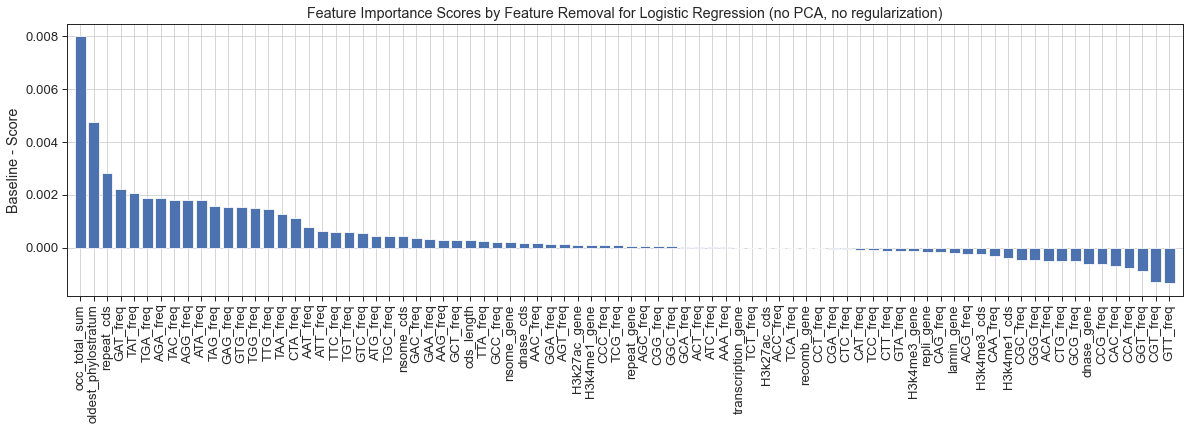

In [70]:
plt.figure(figsize=(20,5))

x_data = lr_imp_df.sort_values(by="Baseline-Score", ascending=False).index.tolist()
y_data = lr_imp_df.sort_values(by="Baseline-Score", ascending=False)["Baseline-Score"].tolist()
plt.bar(x=x_data, height=y_data, label="no pca")

plt.xticks(rotation=90)
plt.title("Feature Importance Scores by Feature Removal for Logistic Regression (no PCA, no regularization)")
plt.ylabel("Baseline - Score")
plt.xlim(-1,82)
plt.savefig("./figures/lr_fi.png", dpi=100, bbox_inches="tight")
plt.show()

## By Coefficients

In [47]:
# Model definition
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, penalty='none')),
])

# Model training
lr_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=2000, penalty='none'))])

In [52]:
# Extract Coefficients (i.e. betas) from Trained Model

# Collect the coefficients into a pandas dataframe
lr_coef_df = pd.DataFrame(lr_clf["lr"].coef_.T, columns=["Beta"], index=features_df.columns)

# Save the coefficients
lr_coef_df.to_csv("./data/lr_betas.csv")

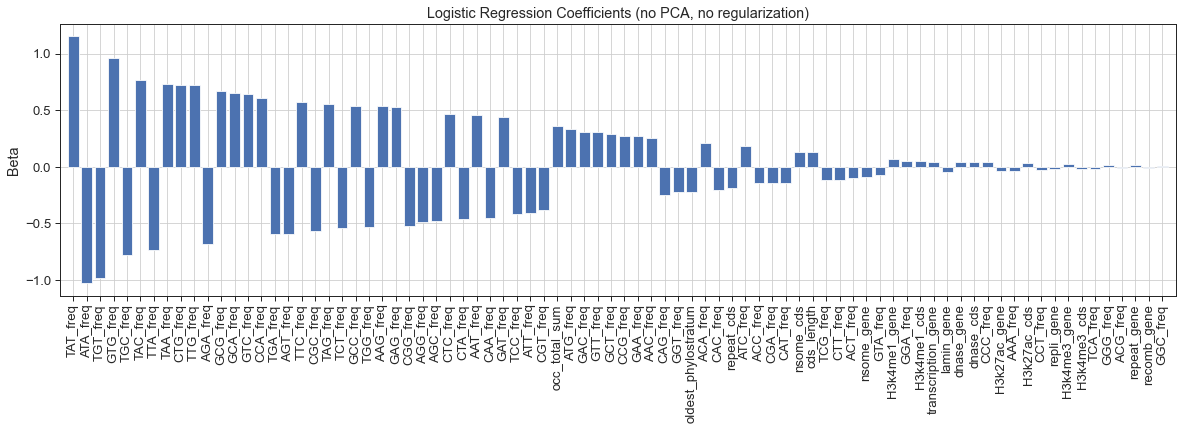

In [166]:
plt.figure(figsize=(20,5))

x_data = lr_coef_df.sort_values(by="Beta", ascending=False, key=abs).index.tolist()
y_data = lr_coef_df.sort_values(by="Beta", ascending=False, key=abs)["Beta"].tolist()
plt.bar(x=x_data, height=y_data)

plt.xticks(rotation=90)
plt.title("Logistic Regression Coefficients (no PCA, no regularization)")
plt.ylabel("Beta")
plt.xlim(-1,82)
plt.savefig("./figures/lr_betas.png", dpi=100, bbox_inches="tight")
plt.show()

## By Permutation Importance

In [114]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

def calc_importances(model, x, y, ranseed=0):
    
    # Train/test split
    x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=ranseed)

    # Train the model on the dataset
    model.fit(x_tr, y_tr) 
    
    # Compare the model against other models trained on permutations of the dataset
    results = permutation_importance(model, x_te, y_te, n_repeats=10, random_state=ranseed, scoring='roc_auc', n_jobs=-1)
    
    return pd.DataFrame(zip(results.importances_mean, results.importances_std), columns=["Score", "StDev"], index=features_df.columns)

In [116]:
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, penalty='none')),
])

lr_perm_df = calc_importances(lr_clf, X, y, ranseed=10) 

In [117]:
lr_perm_df.to_csv("./data/lr_imp_permutation.csv")

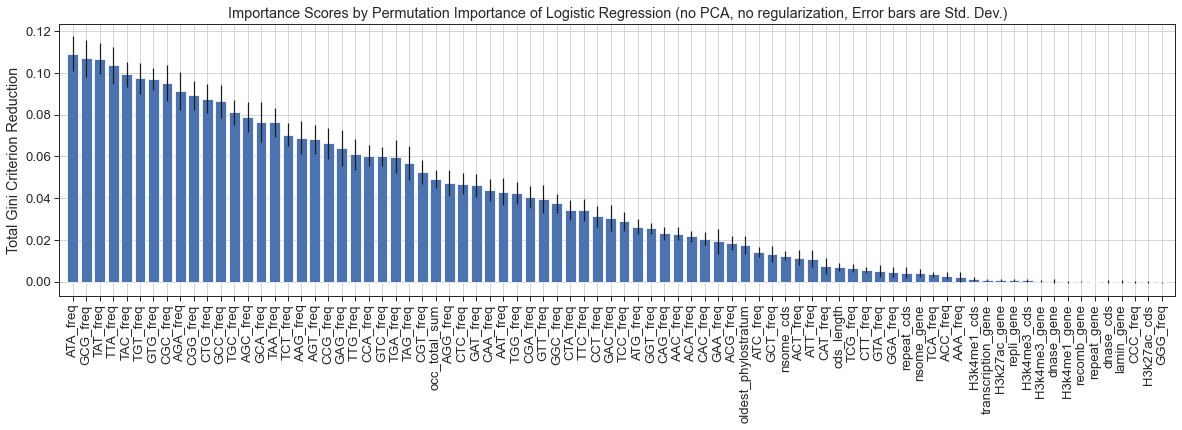

In [118]:
plt.figure(figsize=(20,5))

x_data = lr_perm_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = lr_perm_df.sort_values(by="Score", ascending=False)["Score"].tolist()
err_data = lr_perm_df.sort_values(by="Score", ascending=False)["StDev"].tolist()

plt.bar(x=x_data, height=y_data, yerr=err_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Permutation Importance of Logistic Regression (no PCA, no regularization, Error bars are Std. Dev.)")
plt.ylabel("Total Gini Criterion Reduction")
plt.xlim(-1,82)
plt.savefig("./figures/lr_fi_permutation.png", dpi=100, bbox_inches="tight")
plt.show()

# Feature Importance of Random Forest

## By Total Gini Criterion Reduction

In [21]:
from imblearn.ensemble import BalancedRandomForestClassifier

np.random.seed(3)

rf_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", BalancedRandomForestClassifier(n_estimators=1000, 
                                          min_samples_leaf=10, 
                                          min_samples_split=10,
                                          n_jobs=-1)),
])

rf_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 BalancedRandomForestClassifier(min_samples_leaf=10,
                                                min_samples_split=10,
                                                n_estimators=1000,
                                                n_jobs=-1))])

In [28]:
rf_gini_df = pd.DataFrame(rf_clf["rf"].feature_importances_, index=features_df.columns, columns=["Gini Importance"])
rf_gini_df.to_csv("./data/rf_imp_gini.csv")

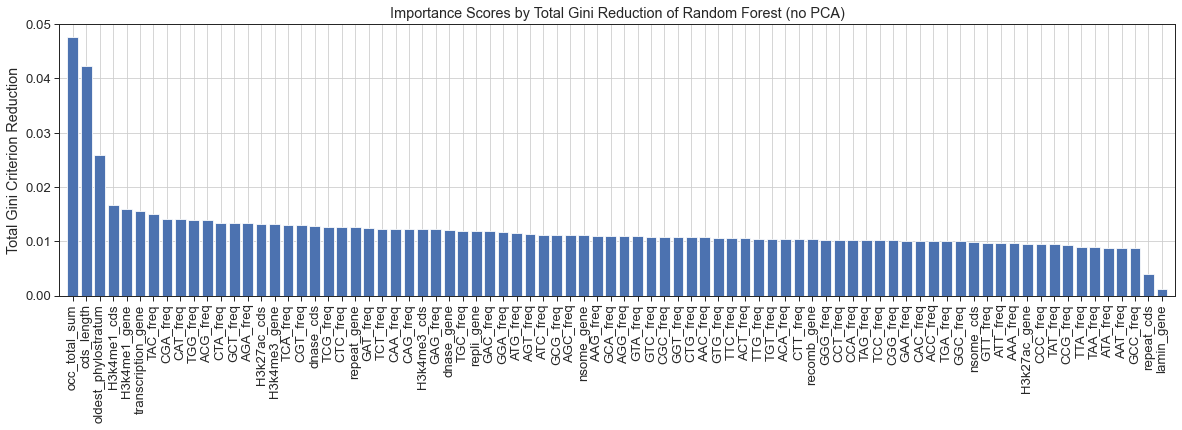

In [72]:
plt.figure(figsize=(20,5))

x_data = rf_gini_df.sort_values(by="Gini Importance", ascending=False).index.tolist()
y_data = rf_gini_df.sort_values(by="Gini Importance", ascending=False)["Gini Importance"].tolist()
plt.bar(x=x_data, height=y_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Total Gini Reduction of Random Forest (no PCA)")
plt.ylabel("Total Gini Criterion Reduction")
plt.xlim(-1,82)
plt.savefig("./figures/rf_fi_gini.png", dpi=100, bbox_inches="tight")
plt.show()

## By Permutation Importance

In [6]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

def calc_importances(model, x, y, ranseed=0):
    
    # Train/test split
    x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=ranseed)

    # Train the model on the dataset
    model.fit(x_tr, y_tr) 
    
    # Compare the model against other models trained on permutations of the dataset
    results = permutation_importance(model, x_te, y_te, n_repeats=10, random_state=ranseed, scoring='roc_auc', n_jobs=-1)
    
    return (features_df.columns.to_list(), results.importances_mean, results.importances_std)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier

rf_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", BalancedRandomForestClassifier(n_estimators=1000, 
                                          min_samples_leaf=10, 
                                          min_samples_split=10,
                                          n_jobs=-1)),
])

x_data, y_data, err_data = calc_importances(rf_clf, X, y, ranseed=30) 

In [14]:
rf_perm_df = pd.DataFrame(zip(y_data, err_data), columns=["Score", "StDev"], index=x_data)
rf_perm_df.head()

,Score,StDev
occ_total_sum,0.020220,0.004102
oldest_phylostratum,0.007497,0.000971
cds_length,0.007424,0.003463
dnase_gene,0.000781,0.000333
dnase_cds,0.000384,0.000663


In [15]:
rf_perm_df.to_csv("./results/rf_imp_permutation.csv")

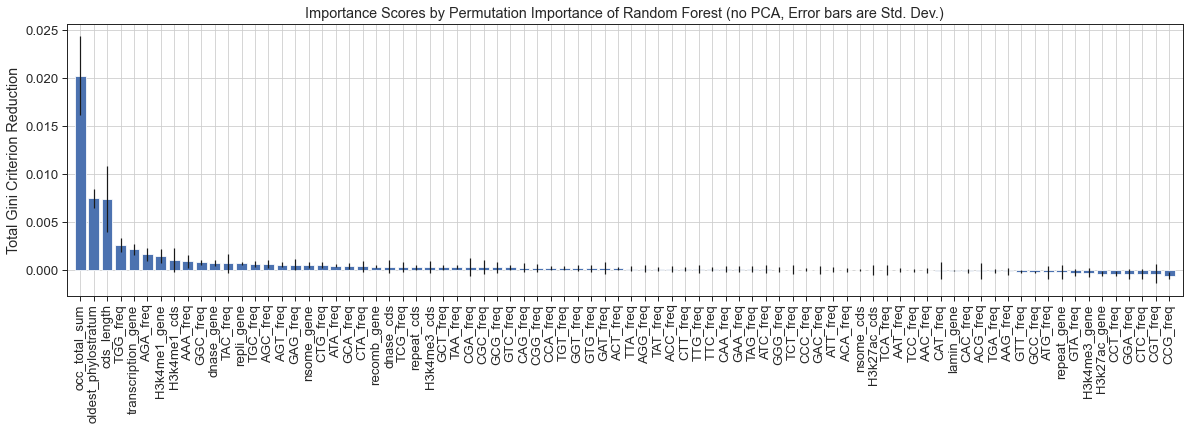

In [16]:
plt.figure(figsize=(20,5))

x_data = rf_perm_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = rf_perm_df.sort_values(by="Score", ascending=False)["Score"].tolist()
err_data = rf_perm_df.sort_values(by="Score", ascending=False)["StDev"].tolist()

plt.bar(x=x_data, height=y_data, yerr=err_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Permutation Importance of Random Forest (no PCA, Error bars are Std. Dev.)")
# plt.ylabel("Total Gini Criterion Reduction")
plt.xlim(-1,82)
plt.savefig("./figures/rf_fi_permutation.png", dpi=100, bbox_inches="tight")
plt.show()

## By Feature Removal

In [41]:
from sklearn.model_selection import cross_val_score

np.random.seed(3)

# Fit the classifier and compute a baseline score
rf_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", BalancedRandomForestClassifier(n_estimators=1000, 
                                          min_samples_leaf=10, 
                                          min_samples_split=10,
                                          n_jobs=-1)),
])

k = 3
baseline_cv = cross_val_score(rf_clf, X, y, cv=k, scoring='roc_auc')
baseline_avg = np.mean(baseline_cv)
baseline_err = np.std(baseline_cv)
print(f"{baseline_avg} +/- {baseline_err}")

0.6816201055646781 +/- 0.018273769501056216


In [66]:
# Define RF
rf_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", BalancedRandomForestClassifier(n_estimators=1000, 
                                          min_samples_leaf=10, 
                                          min_samples_split=10,
                                          n_jobs=-1),),
])

# Importance scoring by feature removal/permutation
features = features_df.columns.tolist()
avg_scores = np.zeros(len(features))
err_scores = np.zeros(len(features))

for i, feature in enumerate(features):
    
    # Drop feature from the data and score with CV
    cv_scores = cross_val_score(
        rf_clf, np.delete(X, i, axis=1), y, cv=k, scoring="roc_auc"
    )

    avg_scores[i] = np.mean(cv_scores)
    err_scores[i] = np.std(cv_scores)

In [67]:
rf_rem_df = pd.DataFrame(
    zip(baseline - avg_scores, np.sqrt(baseline_err**2 + err_scores**2)), 
    index=features, columns=["Baseline-Score", "Error"]
)

In [69]:
rf_rem_df.to_csv("./data/rf_imp_removal.csv")

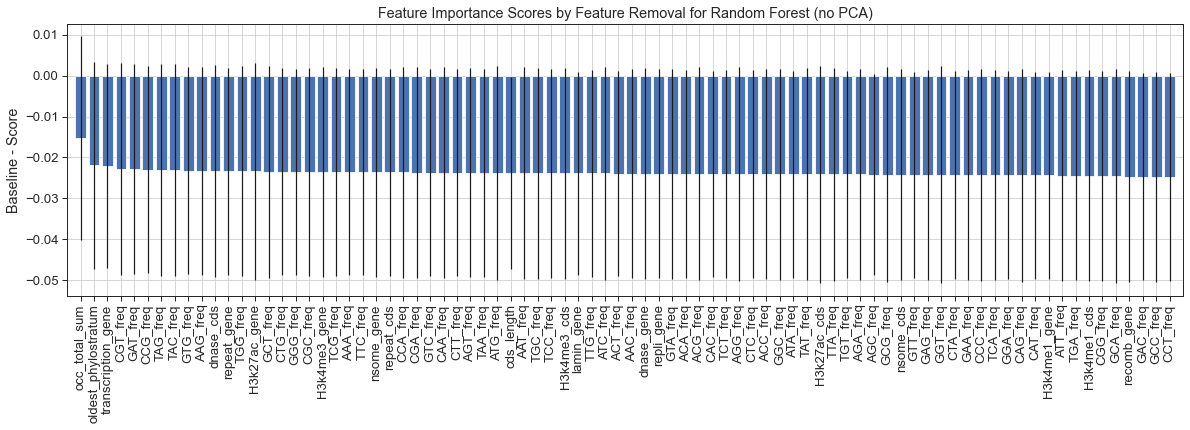

In [74]:
plt.figure(figsize=(20,5))
x_data = rf_rem_df.sort_values(by="Baseline-Score", ascending=False).index.tolist()
y_data = rf_rem_df.sort_values(by="Baseline-Score", ascending=False)["Baseline-Score"].tolist()
err_data = rf_rem_df.sort_values(by="Baseline-Score", ascending=False)["Error"].tolist()

plt.bar(x=x_data, height=y_data, yerr=err_data)
plt.xticks(rotation=90)
plt.title("Feature Importance Scores by Feature Removal for Random Forest (no PCA)")
plt.ylabel("Baseline - Score")
plt.xlim(-1,82)
plt.savefig("./figures/rf_fi_removal.png", dpi=100, bbox_inches="tight")
plt.show()

# From Paolo

In [7]:
pvalues_df = pd.read_csv("../data/write.nopcs.csv", index_col=0)
pvalues_df.set_index('predictor', inplace=True)
pvalues_df.drop(index="TTT_freq", inplace=True)
pvalues_df.head() # La colonna P_multi dovrebbe correlare inversamente con la feature importance

,beta_uni,se_uni,P_uni,beta_multi,se_multi,P_multi
predictor,,,,,,
occ_total_sum,0.429413,0.019466,7.715954e-108,0.364936,0.038081,9.409695e-22
oldest_phylostratum,-0.436526,0.023921,2.122583e-74,-0.224199,0.026348,1.753066e-17
AGT_freq,-0.004001,0.017705,8.212148e-01,-0.598061,0.095062,3.149148e-10
TGT_freq,-0.062253,0.017977,5.342085e-04,-0.988876,0.159902,6.239438e-10
GTG_freq,0.036992,0.017566,3.521633e-02,0.962744,0.159420,1.550501e-09


# Correlations

In [8]:
lr_imp_df = pd.read_csv("./results/lr_importances.csv", index_col=0)
lr_coef_df = pd.read_csv("./results/lr_betas.csv", index_col=0)
lr_perm_df = pd.read_csv("./results/lr_imp_permutation.csv", index_col=0)

rf_gini_df = pd.read_csv("./results/rf_imp_gini.csv", index_col=0)
rf_perm_df = pd.read_csv("./results/rf_imp_permutation.csv", index_col=0)
rf_rem_df = pd.read_csv("./results/rf_imp_removal.csv", index_col=0)

In [9]:
df = pvalues_df #pvalues_df 

df["LR Removal Importance"] = lr_imp_df["Baseline-Score"]
df["LR Permutation Importance"] = lr_perm_df["Score"]

df["LR Coefs (ED)"] = lr_coef_df["Beta"] 
df["Abs LR Coefs (ED)"] = abs(lr_coef_df["Beta"]) 
df["Abs LR Coefs (PP)"] = abs(df["beta_multi"]) 

df["RF Gini Importance"] = rf_gini_df["Gini Importance"]
df["RF Permutation Importance"] = rf_perm_df["Score"]
df["RF Removal Importance"] = rf_rem_df["Baseline-Score"]

df["-Log10 P Values"] = - np.log10(df["P_multi"])

df.head()

,beta_uni,se_uni,P_uni,beta_multi,se_multi,P_multi,LR Removal Importance,LR Permutation Importance,LR Coefs (ED),Abs LR Coefs (ED),Abs LR Coefs (PP),RF Gini Importance,RF Permutation Importance,RF Removal Importance,-Log10 P Values
predictor,,,,,,,,,,,,,,,
occ_total_sum,0.429413,0.019466,7.715954e-108,0.364936,0.038081,9.409695e-22,0.007997,0.049338,0.364814,0.364814,0.364936,0.047653,0.020220,-0.015258,21.026424
oldest_phylostratum,-0.436526,0.023921,2.122583e-74,-0.224199,0.026348,1.753066e-17,0.004769,0.017639,-0.224290,0.224290,0.224199,0.025909,0.007497,-0.021917,16.756202
AGT_freq,-0.004001,0.017705,8.212148e-01,-0.598061,0.095062,3.149148e-10,0.000130,0.068183,-0.596590,0.596590,0.598061,0.011395,0.000607,-0.023701,9.501807
TGT_freq,-0.062253,0.017977,5.342085e-04,-0.988876,0.159902,6.239438e-10,0.000578,0.097313,-0.986162,0.986162,0.988876,0.010476,0.000245,-0.024165,9.204855
GTG_freq,0.036992,0.017566,3.521633e-02,0.962744,0.159420,1.550501e-09,0.001520,0.097095,0.959409,0.959409,0.962744,0.010650,0.000233,-0.023222,8.809528


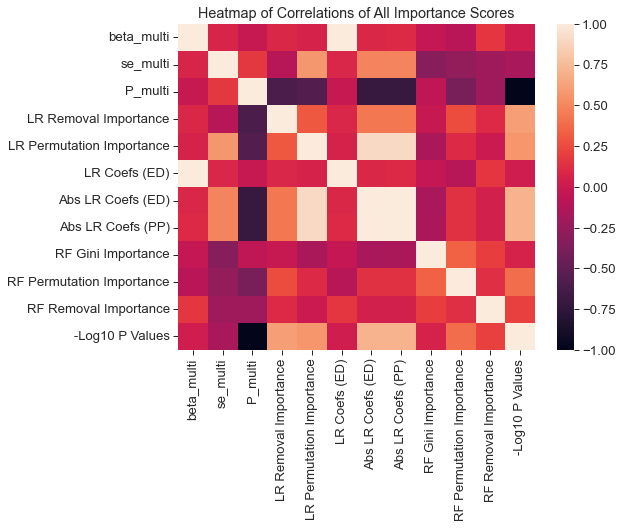

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.iloc[:, 3:].corr(method="spearman"), ax=ax)
plt.title("Heatmap of Correlations of All Importance Scores")
plt.savefig("./figures/imp_heatmap.png", dpi=100, bbox_inches="tight")

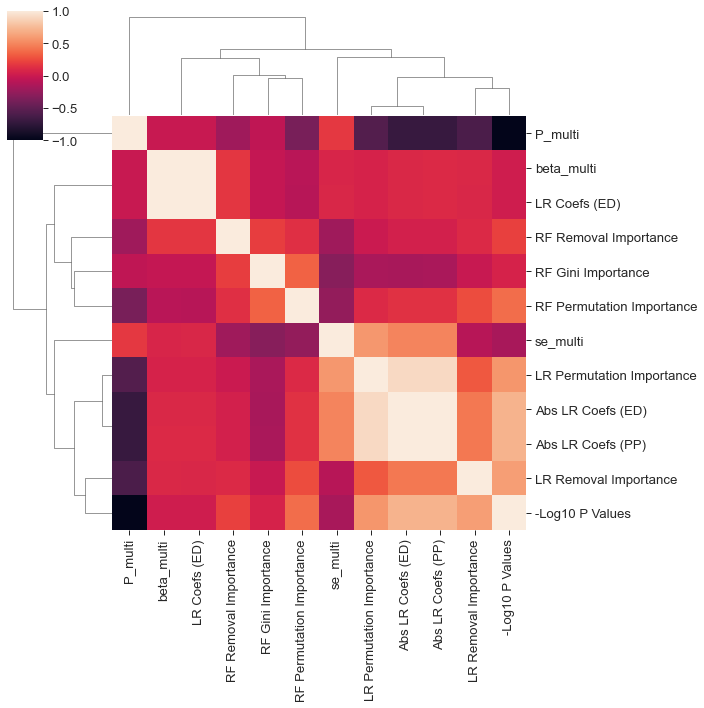

In [11]:
sns.clustermap(df.iloc[:, 3:].corr(method="spearman"), )
plt.savefig("./figures/imp_clustermap.png", dpi=100, bbox_inches="tight")

In [12]:
from scipy.stats import spearmanr

def correlation_plot(DATA, XSERIES, YSERIES,):
    
    sns.scatterplot(data=DATA, x=XSERIES, y=YSERIES)
    
    CORR = spearmanr(DATA[XSERIES], DATA[YSERIES])
    
    plt.annotate(text=f"corr = {CORR.correlation:.5f}", xy=(0.3, 0.9), xycoords='axes fraction')
    plt.annotate(text=f"p = {CORR.pvalue}", xy=(0.3, 0.8), xycoords='axes fraction')

# Correlation within Logistic Regression

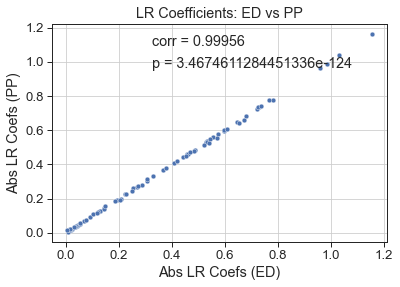

In [13]:
correlation_plot(df, "Abs LR Coefs (ED)", "Abs LR Coefs (PP)", )
plt.title("LR Coefficients: ED vs PP")
plt.savefig("./figures/imp_coef_ed_vs_pp.png", dpi=100, bbox_inches="tight")

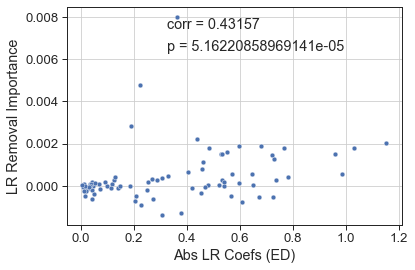

In [14]:
correlation_plot(df, "Abs LR Coefs (ED)", "LR Removal Importance", )
plt.savefig("./figures/imp_coef_vs_imp.png", dpi=100, bbox_inches="tight")

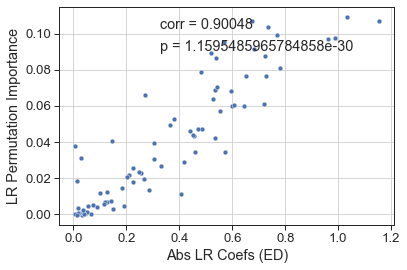

In [17]:
correlation_plot(df, "Abs LR Coefs (ED)", "LR Permutation Importance", )
plt.savefig("./figures/imp_coef_vs_imp.png", dpi=100, bbox_inches="tight")

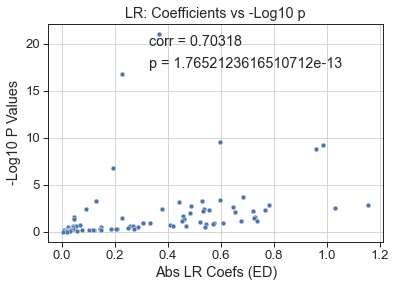

In [89]:
correlation_plot(df, "Abs LR Coefs (ED)", "-Log10 P Values", )
plt.title("LR: Coefficients vs -Log10 p")
plt.savefig("./figures/imp_coef_vs_p.png", dpi=100, bbox_inches="tight")

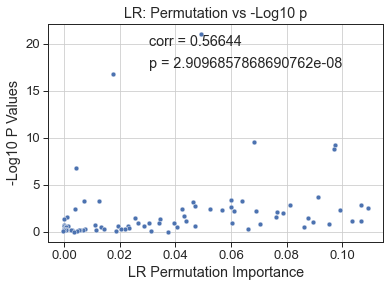

In [154]:
correlation_plot(df, "LR Permutation Importance", "-Log10 P Values", )
plt.title("LR: Permutation vs -Log10 p")
plt.savefig("./figures/imp_lr_perm_vs_p.png", dpi=100, bbox_inches="tight")

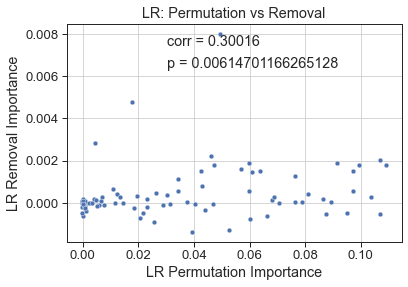

In [155]:
correlation_plot(df, "LR Permutation Importance", "LR Removal Importance", )
plt.title("LR: Permutation vs Removal")
plt.savefig("./figures/imp_lr_perm_vs_remove.png", dpi=100, bbox_inches="tight")

# Correlations within Random Forest

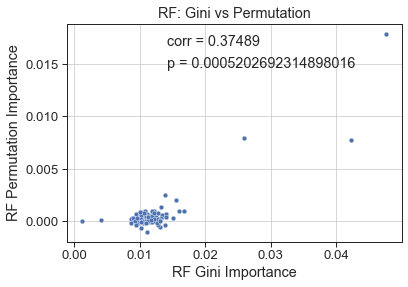

In [94]:
correlation_plot(df, "RF Gini Importance", "RF Permutation Importance", )
plt.title("RF: Gini vs Permutation")
plt.savefig("./figures/imp_gini_vs_perm.png", dpi=100, bbox_inches="tight")

In [156]:
df[df["RF Gini Importance"] > 0.02]

,beta_uni,se_uni,P_uni,beta_multi,se_multi,P_multi,LR Removal Importance,LR Permutation Importance,LR Coefs (ED),Abs LR Coefs (ED),Abs LR Coefs (PP),RF Gini Importance,RF Permutation Importance,RF Removal Importance,-Log10 P Values
predictor,,,,,,,,,,,,,,,
occ_total_sum,0.429413,0.019466,7.715954e-108,0.364936,0.038081,9.409695e-22,0.007997,0.049338,0.364814,0.364814,0.364936,0.047653,0.017857,-0.015258,21.026424
oldest_phylostratum,-0.436526,0.023921,2.122583e-74,-0.224199,0.026348,1.753066e-17,0.004769,0.017639,-0.224290,0.224290,0.224199,0.025909,0.007906,-0.021917,16.756202
cds_length,0.381512,0.018936,2.821363e-90,0.126974,0.036742,5.485186e-04,0.000285,0.006940,0.127167,0.127167,0.126974,0.042279,0.007721,-0.023818,3.260809


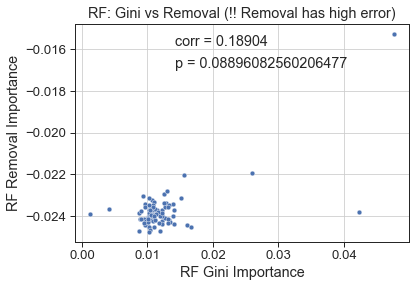

In [161]:
correlation_plot(df, "RF Gini Importance", "RF Removal Importance", )
plt.title("RF: Gini vs Removal (!! Removal has high error)")
plt.savefig("./figures/imp_gini_vs_removal.png", dpi=100, bbox_inches="tight")

In [ ]:
# Sono sempre gli stessi 3 punti! :)

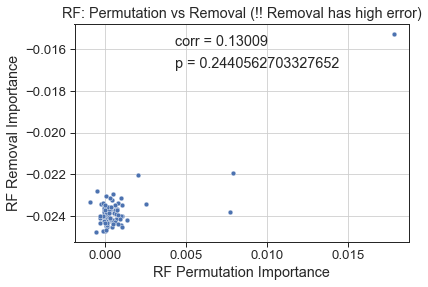

In [162]:
correlation_plot(df, "RF Permutation Importance", "RF Removal Importance", )
plt.title("RF: Permutation vs Removal (!! Removal has high error)")
plt.savefig("./figures/imp_perm_vs_removal.png", dpi=100, bbox_inches="tight")

# Between RF and LR

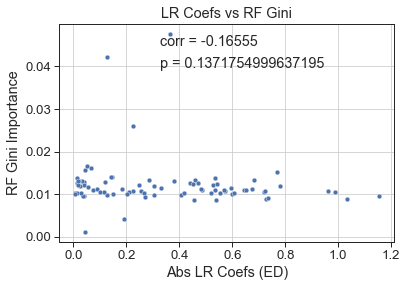

In [97]:
correlation_plot(df, "Abs LR Coefs (ED)", "RF Gini Importance", )
plt.title("LR Coefs vs RF Gini")
plt.savefig("./figures/imp_coef_vs_gini.png", dpi=100, bbox_inches="tight")

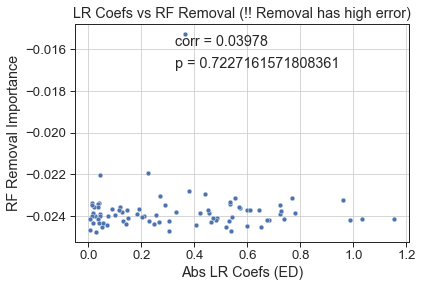

In [163]:
correlation_plot(df, "Abs LR Coefs (ED)", "RF Removal Importance", )
plt.title("LR Coefs vs RF Removal (!! Removal has high error)")
plt.savefig("./figures/imp_coef_vs_removal.png", dpi=100, bbox_inches="tight")

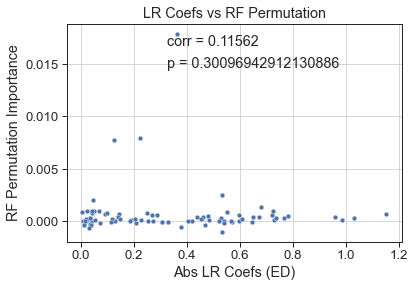

In [99]:
correlation_plot(df, "Abs LR Coefs (ED)", "RF Permutation Importance", )
plt.title("LR Coefs vs RF Permutation")
plt.savefig("./figures/imp_coef_vs_perm.png", dpi=100, bbox_inches="tight")

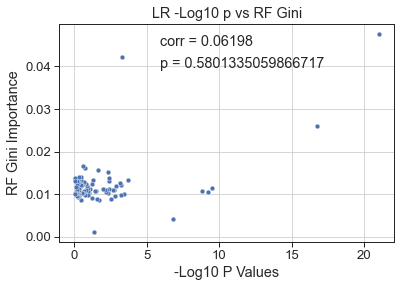

In [101]:
correlation_plot(df, "-Log10 P Values", "RF Gini Importance", )
plt.title("LR -Log10 p vs RF Gini")
plt.savefig("./figures/imp_p_vs_gini.png", dpi=100, bbox_inches="tight")

In [157]:
df[df["-Log10 P Values"] > 5]

,beta_uni,se_uni,P_uni,beta_multi,se_multi,P_multi,LR Removal Importance,LR Permutation Importance,LR Coefs (ED),Abs LR Coefs (ED),Abs LR Coefs (PP),RF Gini Importance,RF Permutation Importance,RF Removal Importance,-Log10 P Values
predictor,,,,,,,,,,,,,,,
occ_total_sum,0.429413,0.019466,7.715954e-108,0.364936,0.038081,9.409695e-22,0.007997,0.049338,0.364814,0.364814,0.364936,0.047653,0.017857,-0.015258,21.026424
oldest_phylostratum,-0.436526,0.023921,2.122583e-74,-0.224199,0.026348,1.753066e-17,0.004769,0.017639,-0.224290,0.224290,0.224199,0.025909,0.007906,-0.021917,16.756202
AGT_freq,-0.004001,0.017705,8.212148e-01,-0.598061,0.095062,3.149148e-10,0.000130,0.068183,-0.596590,0.596590,0.598061,0.011395,0.000624,-0.023701,9.501807
TGT_freq,-0.062253,0.017977,5.342085e-04,-0.988876,0.159902,6.239438e-10,0.000578,0.097313,-0.986162,0.986162,0.988876,0.010476,0.000119,-0.024165,9.204855
GTG_freq,0.036992,0.017566,3.521633e-02,0.962744,0.159420,1.550501e-09,0.001520,0.097095,0.959409,0.959409,0.962744,0.010650,0.000422,-0.023222,8.809528
repeat_cds,-0.240004,0.031391,2.077302e-14,-0.191517,0.036502,1.548417e-07,0.002821,0.004305,-0.191459,0.191459,0.191517,0.004087,0.000133,-0.023669,6.810112


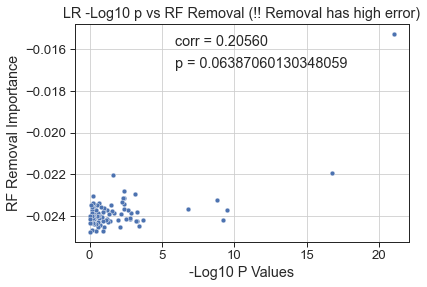

In [164]:
correlation_plot(df, "-Log10 P Values", "RF Removal Importance", )
plt.title("LR -Log10 p vs RF Removal (!! Removal has high error)")
plt.savefig("./figures/imp_p_vs_removal.png", dpi=100, bbox_inches="tight")

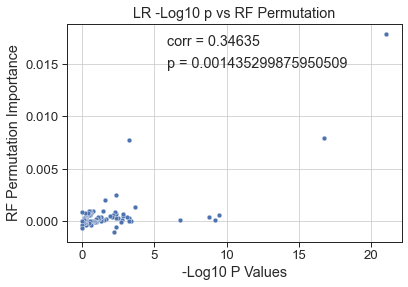

In [103]:
correlation_plot(df, "-Log10 P Values", "RF Permutation Importance", )
plt.title("LR -Log10 p vs RF Permutation")
plt.savefig("./figures/imp_p_vs_perm.png", dpi=100, bbox_inches="tight")

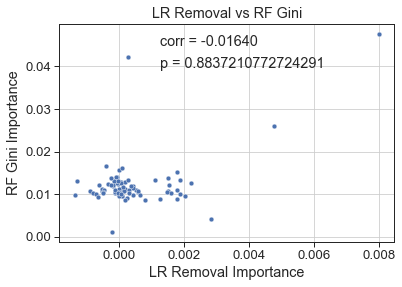

In [105]:
correlation_plot(df, "LR Removal Importance", "RF Gini Importance", )
plt.title("LR Removal vs RF Gini")
plt.savefig("./figures/imp_lr_removal_vs_rf_gini.png", dpi=100, bbox_inches="tight")

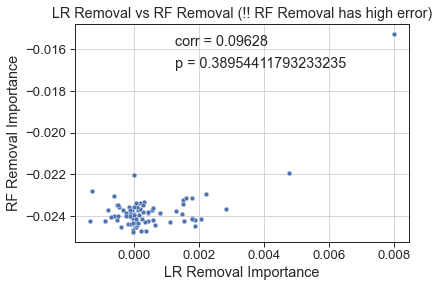

In [165]:
correlation_plot(df, "LR Removal Importance", "RF Removal Importance", )
plt.title("LR Removal vs RF Removal (!! RF Removal has high error)")
plt.savefig("./figures/imp_lr_removal_vs_rf_removal.png", dpi=100, bbox_inches="tight")

In [158]:
df[df["LR Removal Importance"] > 0.004]

,beta_uni,se_uni,P_uni,beta_multi,se_multi,P_multi,LR Removal Importance,LR Permutation Importance,LR Coefs (ED),Abs LR Coefs (ED),Abs LR Coefs (PP),RF Gini Importance,RF Permutation Importance,RF Removal Importance,-Log10 P Values
predictor,,,,,,,,,,,,,,,
occ_total_sum,0.429413,0.019466,7.715954e-108,0.364936,0.038081,9.409695e-22,0.007997,0.049338,0.364814,0.364814,0.364936,0.047653,0.017857,-0.015258,21.026424
oldest_phylostratum,-0.436526,0.023921,2.122583e-74,-0.224199,0.026348,1.753066e-17,0.004769,0.017639,-0.224290,0.224290,0.224199,0.025909,0.007906,-0.021917,16.756202


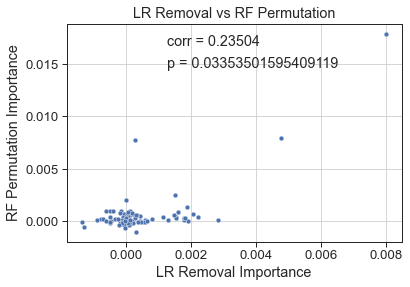

In [107]:
correlation_plot(df, "LR Removal Importance", "RF Permutation Importance", )
plt.title("LR Removal vs RF Permutation")
plt.savefig("./figures/imp_lr_removal_vs_rf_perm.png", dpi=100, bbox_inches="tight")

In [159]:
df[df["RF Permutation Importance"] > 0.005]

,beta_uni,se_uni,P_uni,beta_multi,se_multi,P_multi,LR Removal Importance,LR Permutation Importance,LR Coefs (ED),Abs LR Coefs (ED),Abs LR Coefs (PP),RF Gini Importance,RF Permutation Importance,RF Removal Importance,-Log10 P Values
predictor,,,,,,,,,,,,,,,
occ_total_sum,0.429413,0.019466,7.715954e-108,0.364936,0.038081,9.409695e-22,0.007997,0.049338,0.364814,0.364814,0.364936,0.047653,0.017857,-0.015258,21.026424
oldest_phylostratum,-0.436526,0.023921,2.122583e-74,-0.224199,0.026348,1.753066e-17,0.004769,0.017639,-0.224290,0.224290,0.224199,0.025909,0.007906,-0.021917,16.756202
cds_length,0.381512,0.018936,2.821363e-90,0.126974,0.036742,5.485186e-04,0.000285,0.006940,0.127167,0.127167,0.126974,0.042279,0.007721,-0.023818,3.260809
